In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

import funcs.utils as utils
import funcs.plotting as plot
import funcs.amyloid as amyloid
from tqdm import tqdm

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
PROCESSED_DIR = "data/processed"

### 1. Load Data
---

In [3]:
data_df = pd.read_csv(os.path.join(PROCESSED_DIR, "dataset_processed.tsv"), sep='\t', index_col=0).rename(columns=amyloid.ddict_unclean)

# Fix Dates
data_df = pd.concat([pd.to_datetime(data_df[amyloid.dates][var], format="mixed") for var in amyloid.dates], axis=1, keys=amyloid.dates).join(
    data_df.drop(amyloid.dates, axis=1)  
)

# Add clusters
data_df = data_df.join(
    pd.read_csv(os.path.join(PROCESSED_DIR,"AL_with_ccp_03.tsv"), sep="\t", index_col=0).rename(columns=amyloid.ddict_unclean)['fna3_cluster_n']
)

data_df = data_df[data_df['fna3_cluster_n'].notna()]

### 2. Comparisons
---

In [6]:
cardiac_stage = "BU (BNP-based) cardiac staging"
renal_stage = "Renal Stage (Palladini)"

In [7]:
data_df[data_df[cardiac_stage]=="stage IIIb"].groupby("fna3_cluster_n").size()

fna3_cluster_n
High            92
Intermediate    29
Low             45
dtype: int64

In [15]:
utils.run_statistical_comparisons(
    data_df[data_df[renal_stage]=="Stage I"], 
    "fna3_cluster_n", 
    "data/clustering/full_na_dataset/subgroup_comparisons",
    tag="_renal_stage_1"
)

100%|██████████| 3/3 [00:00<00:00, 82.40it/s]


In [18]:
utils.run_statistical_comparisons(
    data_df[data_df[cardiac_stage]=="stage IIIb"], 
    "fna3_cluster_n", 
    "data/clustering/full_na_dataset/subgroup_comparisons",
    tag="_cardiac_stage_3b"
)

utils.run_statistical_comparisons(
    data_df[data_df[cardiac_stage]=="stage III"], 
    "fna3_cluster_n", 
    "data/clustering/full_na_dataset/subgroup_comparisons",
    tag="_cardiac_stage_3"
)

100%|██████████| 3/3 [00:00<00:00, 108.98it/s]


In [17]:
utils.run_statistical_comparisons(
    data_df[data_df[cardiac_stage]=="stage II"], 
    "fna3_cluster_n", 
    "data/clustering/full_na_dataset/subgroup_comparisons",
    tag="_cardiac_stage_2"
)

100%|██████████| 3/3 [00:00<00:00, 95.14it/s]


In [9]:
# For reviewer
# Low-risk x 3b analysis

In [56]:
data_df[data_df["fna3_cluster_n"]=="Low"].groupby(cardiac_stage).size() / data_df[data_df["fna3_cluster_n"]=="Low"].shape[0]

BU (BNP-based) cardiac staging
stage I       0.218818
stage II      0.277899
stage III     0.054705
stage IIIb    0.049234
dtype: float64

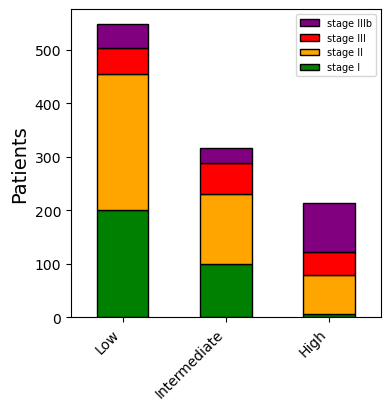

In [55]:
from typing import Union

def plot_stacked_by_group(
    df: pd.DataFrame,
    x: str,
    y: str,
    order: Union[None, list] = None,
    figsize: tuple = (4,4),
    ax = None,
    cmap = None
    ):

    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)

    _df = df.groupby([x,y]).size().reset_index().pivot(index=x, columns=y, values=0)

    if order is not None:
        _df = _df.loc[order]
    
    _df.plot(
        kind='bar', 
        stacked=True,
        ax=ax,
        rasterized=True,
        color=cmap,
        linewidth=1,
        edgecolor='black',
    )

    handles, labels = ax.get_legend_handles_labels()
    labels.reverse()
    handles.reverse()

    ax.legend(handles, labels, loc='upper right', fontsize=7)
    ax.set_ylabel("Patients", fontsize=14)
    ax.set_xlabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    return ax


BU_COLORS = {"stage I":"green","stage II":"orange","stage III":"red","stage IIIb":"purple"}
 
plot_stacked_by_group(
    data_df, x='fna3_cluster_n', y=cardiac_stage, 
    cmap=BU_COLORS, order=["Low","Intermediate","High"])

plt.savefig("figures/subgroup_by_cardaic_stage_barplot.svg", dpi=200, bbox_inches="tight")

In [10]:
utils.run_statistical_comparisons(
    data_df[data_df["fna3_cluster_n"]=="Low"], 
    cardiac_stage, 
    "data/clustering/full_na_dataset/subgroup_comparisons",
    tag="_subgroup_low"
)

100%|██████████| 4/4 [00:00<00:00, 93.87it/s]


In [53]:
! pwd

/Users/shankaraanand/My Drive/BUSM/Research/AL Amyloidosis Clustering/amyloidosis_bmc_2023
